# Lab | Cleaning numerical data

### The Data Analysis Process:

- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling -Validation
- Reporting
- Instructions


#### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### 3. First look at its main features (head, shape, info). 
NOTE The target column is total_claim_amount

In [3]:
data.shape

(9134, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
Response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
new_column_names = [col.replace(' ', '_').lower() for col in data.columns]
data.columns = new_column_names


In [7]:
data.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### 5. Change effective to date column to datetime format.

In [8]:
# Convert the 'Date_String' column to datetime format
data['effective_date'] = pd.to_datetime(data['effective_to_date'])
data

# Drop the original 'Date_String' column if needed
data.drop(columns=['effective_to_date'], inplace=True)

#### 6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [9]:
numerical_df = data.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [10]:
numerical_df.isnull().sum()/len(numerical_df)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

#### 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [11]:
def split_continuous_discrete(df):
    
    discrete_columns = [col for col in df.columns if df[col].nunique() < 10]
    continuous_columns = [col for col in df.columns if df[col].nunique() > 10]

    return df[continuous_columns], df[discrete_columns]

In [12]:
continuous_df, discrete_df = split_continuous_discrete(numerical_df)


In [13]:
X = continuous_df.drop(['total_claim_amount'], axis=1)

#### 8. Plot a correlation matrix, comment what you see.

In [14]:
correlations_matrix = X.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

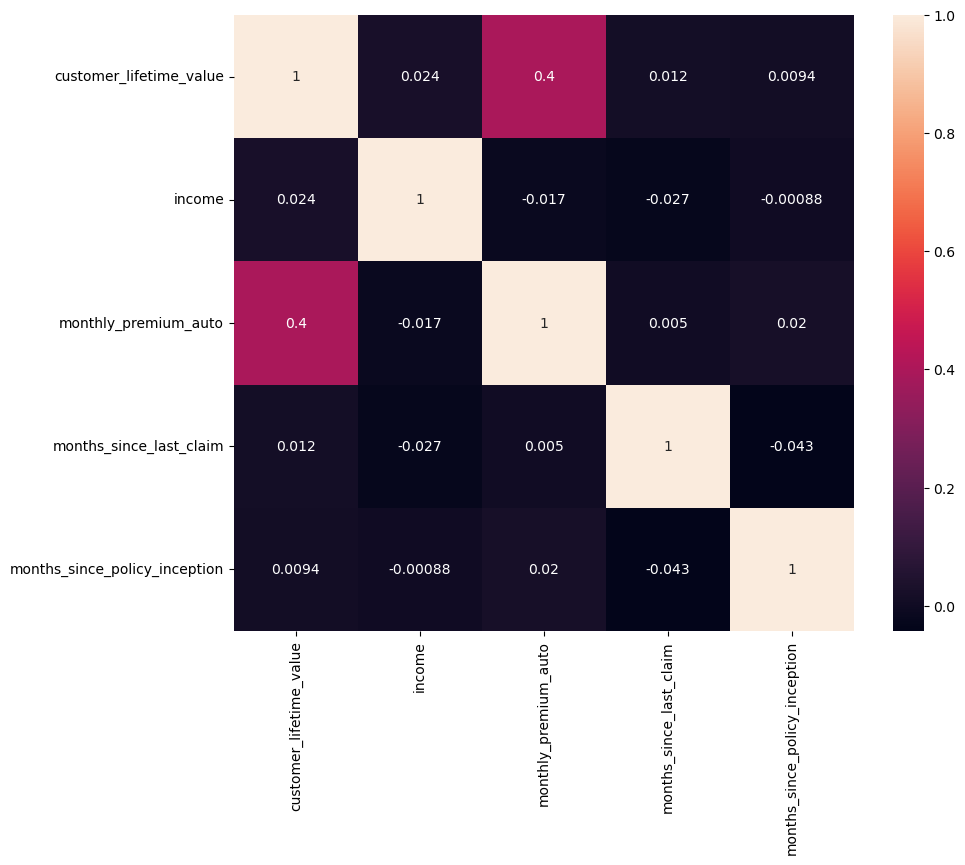

In [16]:
corr_matrix = X.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


Comment:  There is no close independent variable correlation with each other.


#### 9. Create a function to plot every discrete variable. Do the same with the continuous variables 
(Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [18]:
discrete_df['number_of_open_complaints'].value_counts(dropna = False)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [19]:
discrete_df['number_of_policies'].value_counts(dropna = False)

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [20]:
discrete_df_columns = ['number_of_open_complaints', 'number_of_policies']
    

In [21]:
def plot_discrete_variables(df):
    for col in discrete_df_columns:
        sns.countplot(x=col, data=discrete_df)
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"Count of {col}")
        plt.show()

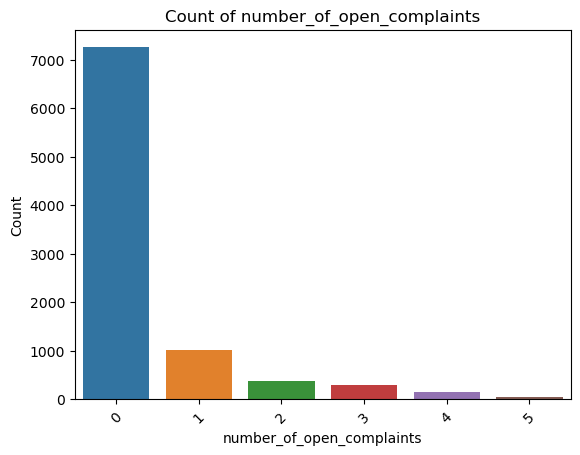

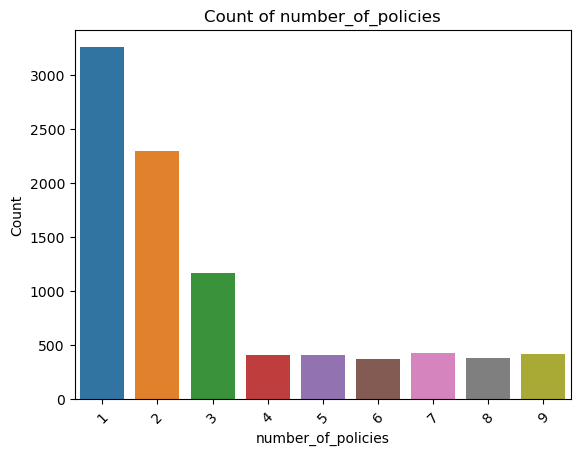

In [22]:
plot_discrete_variables(discrete_df)

In [23]:
def plot_continuous_df(df):
    for col in X.columns:
        sns.distplot(X[col], kde=True)
        plt.title(col)
        plt.show()

/var/folders/ng/k4dhfwcs2md27b2dv9tc_4zw0000gn/T/ipykernel_83595/2218844014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], kde=True)


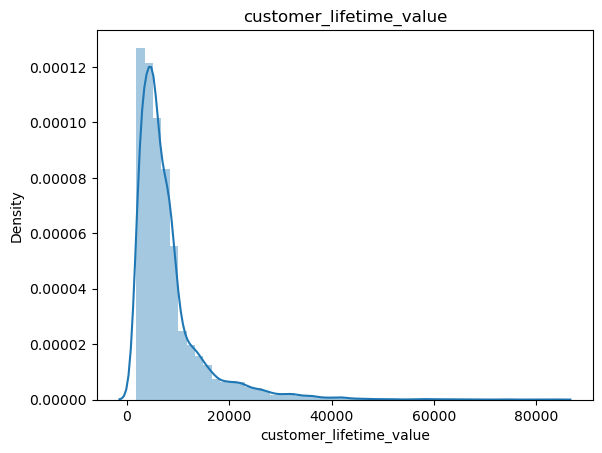

/var/folders/ng/k4dhfwcs2md27b2dv9tc_4zw0000gn/T/ipykernel_83595/2218844014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], kde=True)


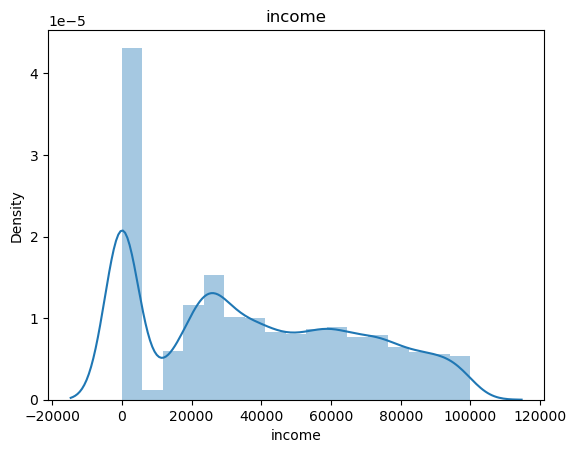

/var/folders/ng/k4dhfwcs2md27b2dv9tc_4zw0000gn/T/ipykernel_83595/2218844014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], kde=True)


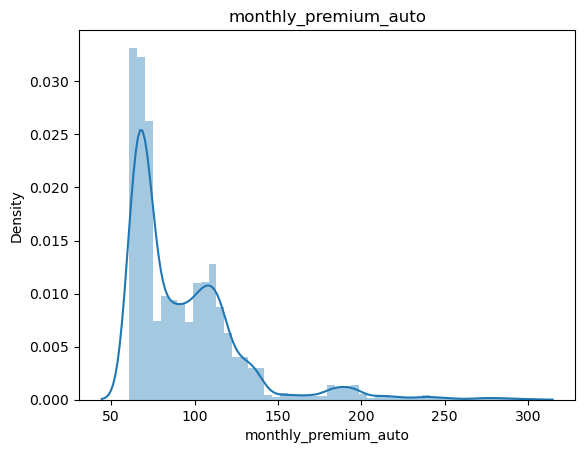

/var/folders/ng/k4dhfwcs2md27b2dv9tc_4zw0000gn/T/ipykernel_83595/2218844014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], kde=True)


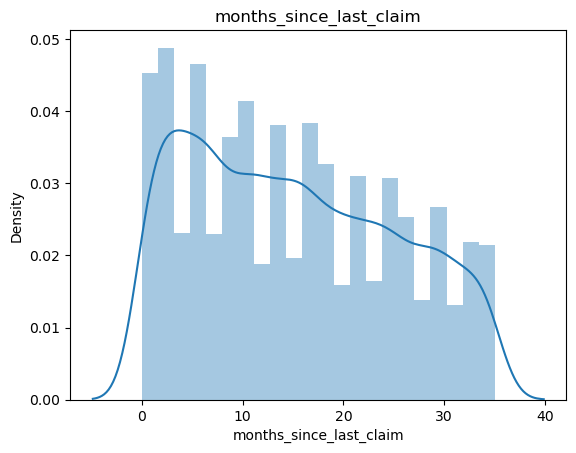

/var/folders/ng/k4dhfwcs2md27b2dv9tc_4zw0000gn/T/ipykernel_83595/2218844014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col], kde=True)


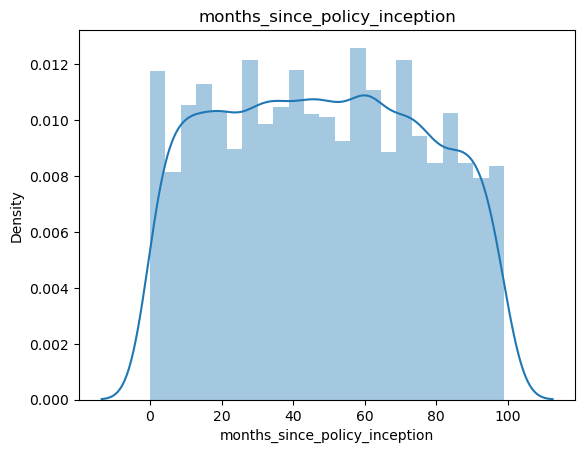

In [24]:
plot_continuous_df(continuous_df)

#### 10. Comments on the plots

Monthly premium auto has some correlation with income. Furthermore, income has been reported  at zero for 25% of the data. Therefore, fix zero income with the median income.

In [31]:
continuous_df['income'].value_counts(dropna=False)

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [32]:
continuous_df['income'].mean()

37657.38000875848

In [33]:
continuous_df['income'].median()

33889.5

In [34]:
continuous_df['income'].mode()

0    0
Name: income, dtype: int64

In [40]:
median_income = continuous_df['income'].median()
continuous_df['income'] = np.where(continuous_df['income'] == 0, median_income, continuous_df['income'])

/var/folders/ng/k4dhfwcs2md27b2dv9tc_4zw0000gn/T/ipykernel_83595/1949426320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df['income'] = np.where(continuous_df['income'] == 0, median_income, continuous_df['income'])


<Axes: >

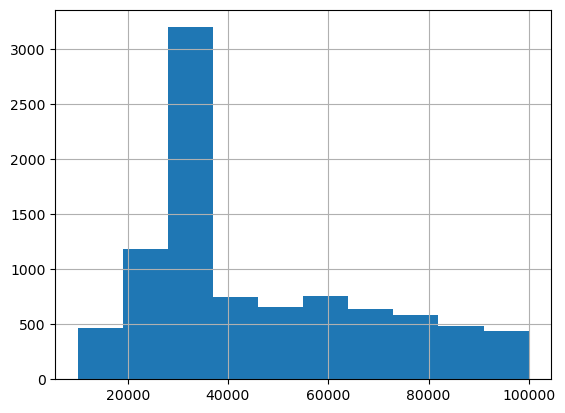

In [37]:
continuous_df['income'].hist(bins=10)  

#### 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [38]:
def plot_continuous_boxplots(data_frame, continuous_columns):
    for col in continuous_df_columns:
        sns.boxplot(x=col, data=continuous_df)
        plt.xlabel(col)
        plt.ylabel("Value")
        plt.title(f"Box Plot of {col}")
        plt.show()
continuous_df_columns = ['monthly_premium_auto', 'income', 'total_claim_amount', 'months_since_last_claim', 'months_since_policy_inception']


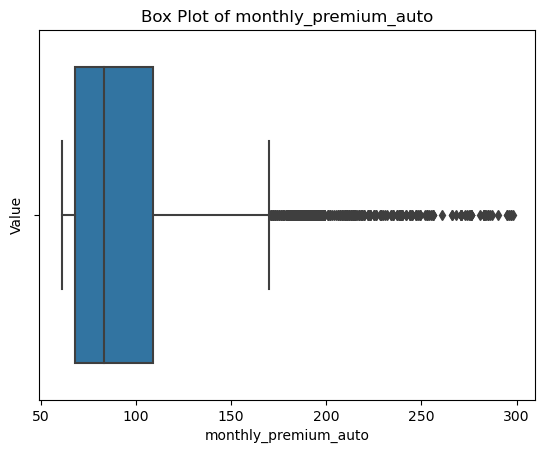

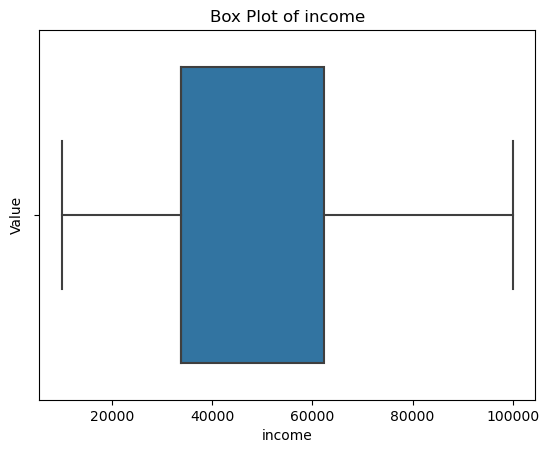

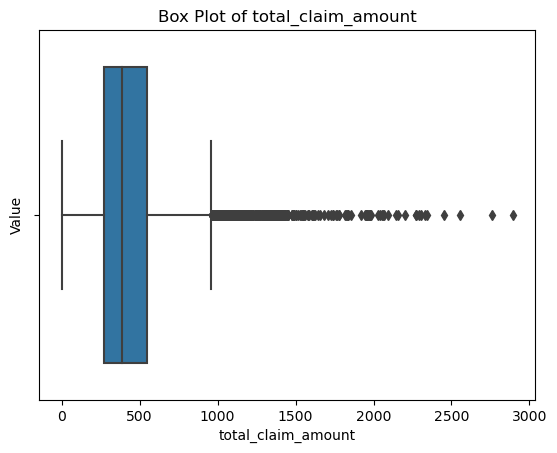

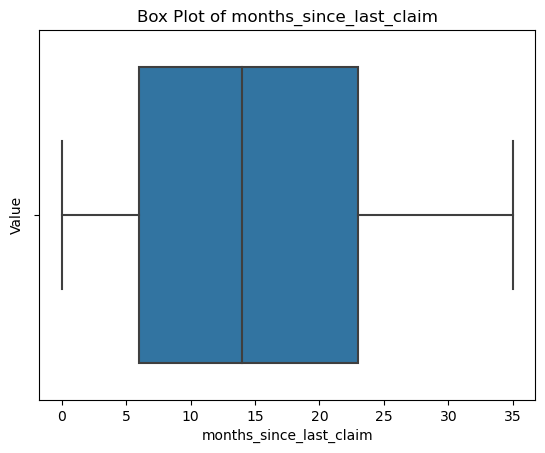

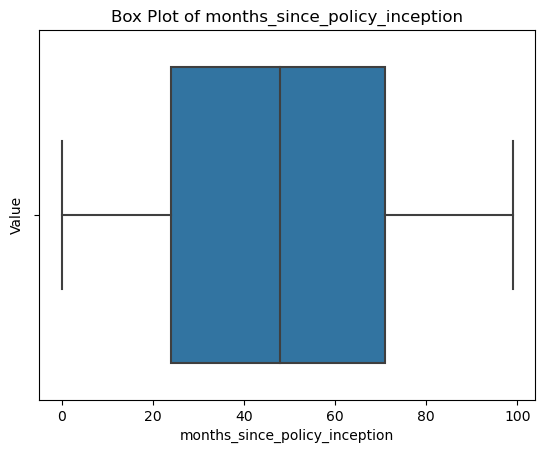

In [39]:
plot_continuous_boxplots(continuous_df, continuous_df_columns)

#### 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [ ]:
Yes, within monthly_premium_auto, it is displaying a lot of outlier activity

In [59]:
np.percentile(numerical_df['monthly_premium_auto'],75)

109.0

In [60]:
iqr = np.percentile(continuous_df['monthly_premium_auto'],75) - np.percentile(numerical_df['monthly_premium_auto'],25)

In [61]:
upper_limit = np.percentile(numerical_df['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = numerical_df[numerical_df['monthly_premium_auto'] > upper_limit]
len(extraordinary_points)  # This checks the number of rows that will be removed

166.0


446

In [64]:
# only 446ows are affected, < 5% of the dataframe. These may be removed now.
upper_limit = np.percentile(data['monthly_premium_auto'], 75) + 1.5*iqr
data = data[data['monthly_premium_auto'] <= upper_limit]

In [65]:
data.shape


(8688, 24)

#### 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [69]:
nan_check = data.isna().sum()
print(nan_check)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
effective_date                   0
dtype: int64


In [77]:
nan_count= data.isnull().sum()
print(nan_count)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
effective_date                   0
dtype: int64


#### 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [78]:
data.to_csv('numerical.csv', index=False)

# Done morning-lab

In [ ]:
# Continue in afternoon-lab

# Lab | Cleaning categorical data

For this lab, we will be using the same notebook as in the previous lab.

## Data Analysis Process

### Remember the process:
- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling -Validation
- Reporting